### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

### Data Preprocessing

In [2]:
data_url = "./Data/card_transdata.csv"

data = pd.read_csv(data_url)

print(data.shape)

data.head()

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Data Splitting

In [3]:
train_url = "./Data/Train/train_data.csv"
test_url = "./Data/Test/test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

train_X = train_data.drop(columns="fraud")
train_Y = train_data["fraud"]

test_X = test_data.drop(columns="fraud")
test_Y = test_data["fraud"]

In [4]:
print(f"Training Data Shapes: {train_X.shape}, {train_Y.shape}")
print(f"Testing Data Shapes: {test_X.shape}, {test_Y.shape}")

print(f"Training Data Fraud Value Counts:\n{train_Y.value_counts()}")
print(f"Testing Data Fraud Value Counts:\n{test_Y.value_counts()}")

Training Data Shapes: (800000, 7), (800000,)
Testing Data Shapes: (200000, 7), (200000,)
Training Data Fraud Value Counts:
0.0    730181
1.0     69819
Name: fraud, dtype: int64
Testing Data Fraud Value Counts:
0.0    182416
1.0     17584
Name: fraud, dtype: int64


### KNN

#### Default - 5 Neighbors

In [5]:
ccdata_knn = KNeighborsClassifier(weights="distance")
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(weights='distance')

In [6]:
predict_Y_knn = ccdata_knn.predict(test_X)
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print(acc_knn)

0.984885


In [7]:
confusion_matrix(test_Y, predict_Y_knn)

array([[180571,   1845],
       [  1178,  16406]], dtype=int64)

In [8]:
f1_score(test_Y, predict_Y_knn)

0.9156411329705595

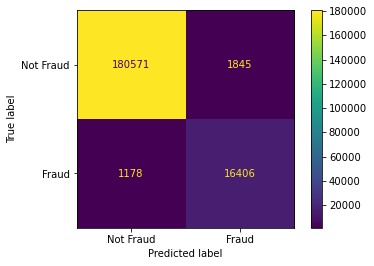

In [9]:
confusion_matrix5 = np.array([[180571,      1845],
       [   1178,  16406]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix5, display_labels=["Not Fraud", "Fraud"])
disp.plot()

#### 1 Neighbor

In [10]:
ccdata_knn = KNeighborsClassifier(weights="distance", n_neighbors=1)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [11]:
predict_Y_knn = ccdata_knn.predict(test_X)
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print(acc_knn)

0.986235


In [12]:
confusion_matrix(test_Y, predict_Y_knn)

array([[180774,   1642],
       [  1111,  16473]], dtype=int64)

In [13]:
f1_score(test_Y, predict_Y_knn)

0.9228829939213984

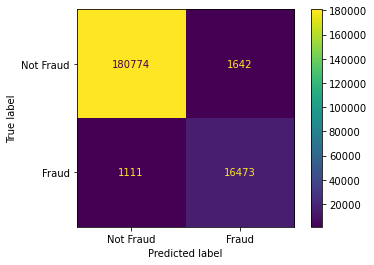

In [14]:
confusion_matrix1 = np.array([[180774,   1642],
       [  1111,  16473]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=["Not Fraud", "Fraud"])
disp.plot()

#### 2 Neighbors

In [15]:
ccdata_knn = KNeighborsClassifier(weights="distance", n_neighbors=2)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [16]:
predict_Y_knn = ccdata_knn.predict(test_X)
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print(acc_knn)

0.986235


In [17]:
confusion_matrix(test_Y, predict_Y_knn)

array([[180774,   1642],
       [  1111,  16473]], dtype=int64)

In [18]:
f1_score(test_Y, predict_Y_knn)

0.9228829939213984

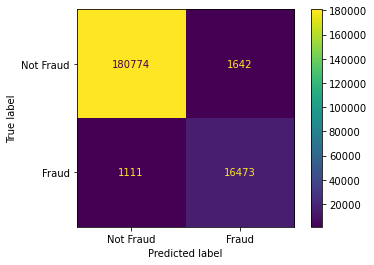

In [19]:
confusion_matrix2 = np.array([[180774,   1642],
       [  1111,  16473]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels=["Not Fraud", "Fraud"])
disp.plot()

#### 3 Neighbors

In [20]:
ccdata_knn = KNeighborsClassifier(weights="distance", n_neighbors=3)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [21]:
predict_Y_knn = ccdata_knn.predict(test_X)
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print(acc_knn)
print(predict_Y_knn.shape)

0.985315
(200000,)


In [22]:
confusion_matrix(test_Y, predict_Y_knn)

array([[180640,   1776],
       [  1161,  16423]], dtype=int64)

In [23]:
f1_score(test_Y, predict_Y_knn)

0.9179219182293268

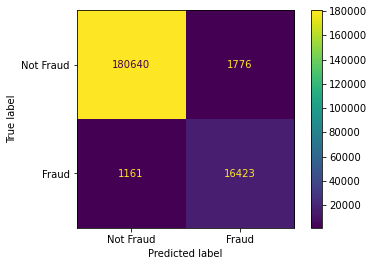

In [24]:
confusion_matrix3 = np.array([[180640,   1776],
       [  1161,  16423]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix3, display_labels=["Not Fraud", "Fraud"])
disp.plot()

#### 10 Neighbors

In [25]:
ccdata_knn = KNeighborsClassifier(weights="distance", n_neighbors=10)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [26]:
predict_Y_knn = ccdata_knn.predict(test_X)
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print(acc_knn)

0.984375


In [27]:
confusion_matrix(test_Y, predict_Y_knn)

array([[180542,   1874],
       [  1251,  16333]], dtype=int64)

In [28]:
f1_score(test_Y, predict_Y_knn)

0.9126875471487245

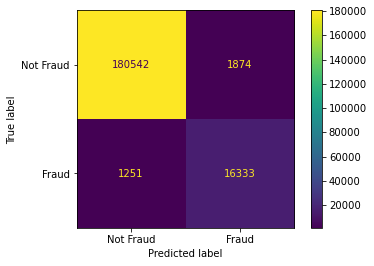

In [29]:
confusion_matrix10 = np.array([[180542,   1874],
       [  1251,  16333]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix10, display_labels=["Not Fraud", "Fraud"])
disp.plot()